In [16]:
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
colors = pd.read_csv('/content/sample_data/data/colors.csv')

In [5]:
colors.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [7]:
colors['name'].nunique()

135

In [8]:
colors.groupby('is_trans').count()

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


In [9]:
colors.is_trans.value_counts()

,count
is_trans,
f,107
t,28


In [10]:
data1 = pd.read_csv('/content/sample_data/data/sets.csv')


In [11]:
data1.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [12]:
data1.sort_values('year').head()

,set_num,name,year,theme_id,num_parts
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9534,700.2-1,Large Gift Set (ABB),1949,365,178


In [13]:
data1[data1['year'] == 1949]

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


In [15]:
data1.sort_values('num_parts', ascending=False).head()

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


In [28]:
sets_by_year = data1.groupby('year').count()
sets_by_year['set_num'].head()

,set_num
year,
1949,5
1950,6
1953,4
1954,14
1955,28


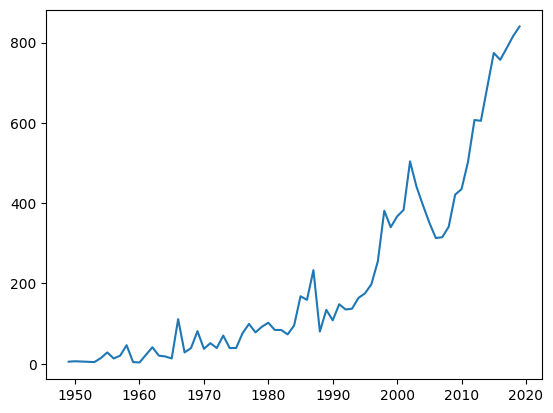

In [31]:
plt.plot(sets_by_year.index[:-2], sets_by_year.set_num[:-2])
plt.show()

In [32]:
themes = pd.read_csv('/content/sample_data/data/themes.csv')

In [33]:
themes_by_year = data1.groupby('year').agg({'theme_id': pd.Series.nunique})

In [34]:
themes_by_year.rename(columns={'theme_id': 'nr_themes'}, inplace=True)

In [36]:
themes_by_year.head()

,nr_themes
year,
1949,2
1950,1
1953,2
1954,2
1955,4


In [38]:
themes_by_year.tail()

,nr_themes
year,
2017,89
2018,93
2019,78
2020,82
2021,1


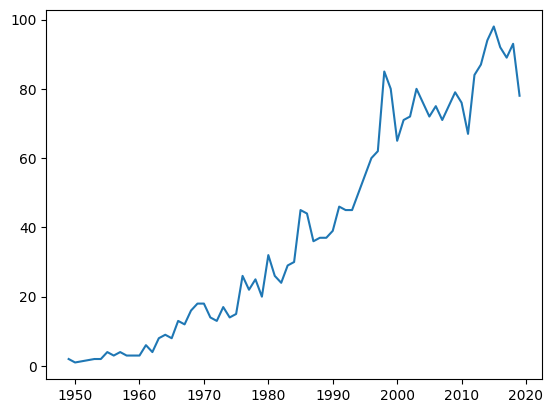

In [39]:
plt.plot(themes_by_year.index[:-2], themes_by_year.nr_themes[:-2])
plt.show()

Text(0, 0.5, 'Number of themes')

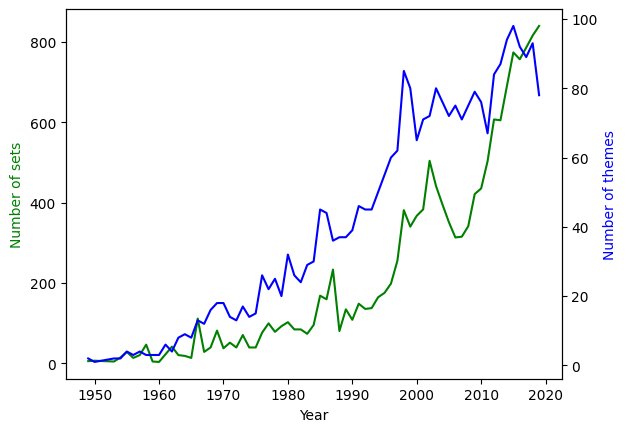

In [44]:
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(sets_by_year.index[:-2], sets_by_year.set_num[:-2], color='g')
ax2.plot(themes_by_year.index[:-2], themes_by_year.nr_themes[:-2], color='b')

ax1.set_xlabel('Year')
ax1.set_ylabel('Number of sets', color='g')
ax2.set_ylabel('Number of themes', color='b')



In [45]:
parts_per_set = data1.groupby('year').agg({'num_parts': pd.Series.mean})

In [46]:
parts_per_set.head()

,num_parts
year,
1949,99.600000
1950,1.000000
1953,13.500000
1954,12.357143
1955,36.607143


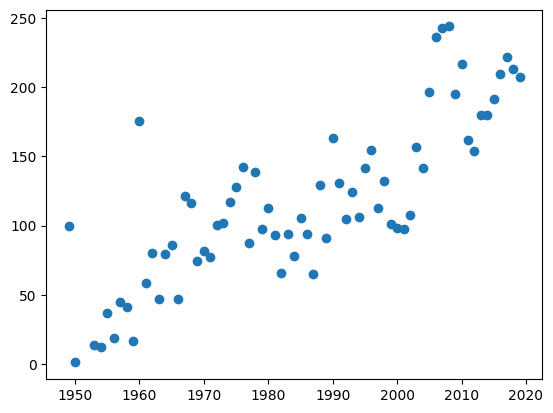

In [47]:
plt.scatter(parts_per_set.index[:-2], parts_per_set.num_parts[:-2])
plt.show()

In [50]:
set_theme_count = data1["theme_id"].value_counts()
set_theme_count[:5]

,count
theme_id,
158,753
501,656
494,398
435,356
503,329


In [51]:
themes.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [55]:
themes[themes.name == 'Star Wars']

,id,name,parent_id
17,18,Star Wars,1.0
150,158,Star Wars,NaN
174,209,Star Wars,207.0
211,261,Star Wars,258.0


In [56]:
data1[data1.theme_id == 18]

,set_num,name,year,theme_id,num_parts,1965,1978,1987,1979,1966,...,1959,1962,1961,1960,1963,1949,1950,1953,1954,2021
8786,65081-1,R2-D2 / C-3PO Droid Collectors Set,2002,18,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12051,8000-1,Pit Droid,2000,18,223,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12058,8001-1,Battle Droid,2000,18,336,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12066,8002-1,Destroyer Droid,2000,18,567,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12071,8007-1,C-3PO,2001,18,339,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12072,8008-1,Stormtrooper,2001,18,360,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12073,8009-1,R2-D2,2002,18,239,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12074,8010-1,Darth Vader,2002,18,388,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12081,8011-1,Jango Fett,2002,18,425,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12083,8012-1,Super Battle Droid,2002,18,378,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
data1[data1.theme_id == 209]

,set_num,name,year,theme_id,num_parts,1965,1978,1987,1979,1966,...,1959,1962,1961,1960,1963,1949,1950,1953,1954,2021
11013,75023-1,Star Wars Advent Calendar 2013,2013,209,254,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11046,75056-1,Star Wars Advent Calendar 2014,2014,209,273,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11080,75097-1,Star Wars Advent Calendar 2015,2015,209,291,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11131,75146-1,Star Wars Advent Calendar 2016,2016,209,282,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11173,75184-1,Star Wars Advent Calendar 2017,2017,209,309,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11206,75213-1,Star Wars Advent Calendar 2018,2018,209,307,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11245,75245-1,Star Wars Advent Calendar 2019,2019,209,280,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11281,75279-1,Star Wars Advent Calendar 2020,2020,209,312,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12019,7958-1,Star Wars Advent Calendar 2011,2011,209,267,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14352,9509-1,Star Wars Advent Calendar 2012,2012,209,235,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
set_theme_count = data1['theme_id'].value_counts()
set_theme_count[:5]

,count
theme_id,
158,753
501,656
494,398
435,356
503,329


In [59]:
set_theme_count = pd.DataFrame({'id': set_theme_count.index,
                               'set_count': set_theme_count.values})
set_theme_count.head()

,id,set_count
0,158,753
1,501,656
2,494,398
3,435,356
4,503,329


In [65]:
mergde_df = pd.merge(set_theme_count, themes, on='id')
mergde_df[:3]

,id,set_count,name,parent_id
0,158,753,Star Wars,NaN
1,501,656,Gear,NaN
2,494,398,Friends,NaN


<BarContainer object of 10 artists>

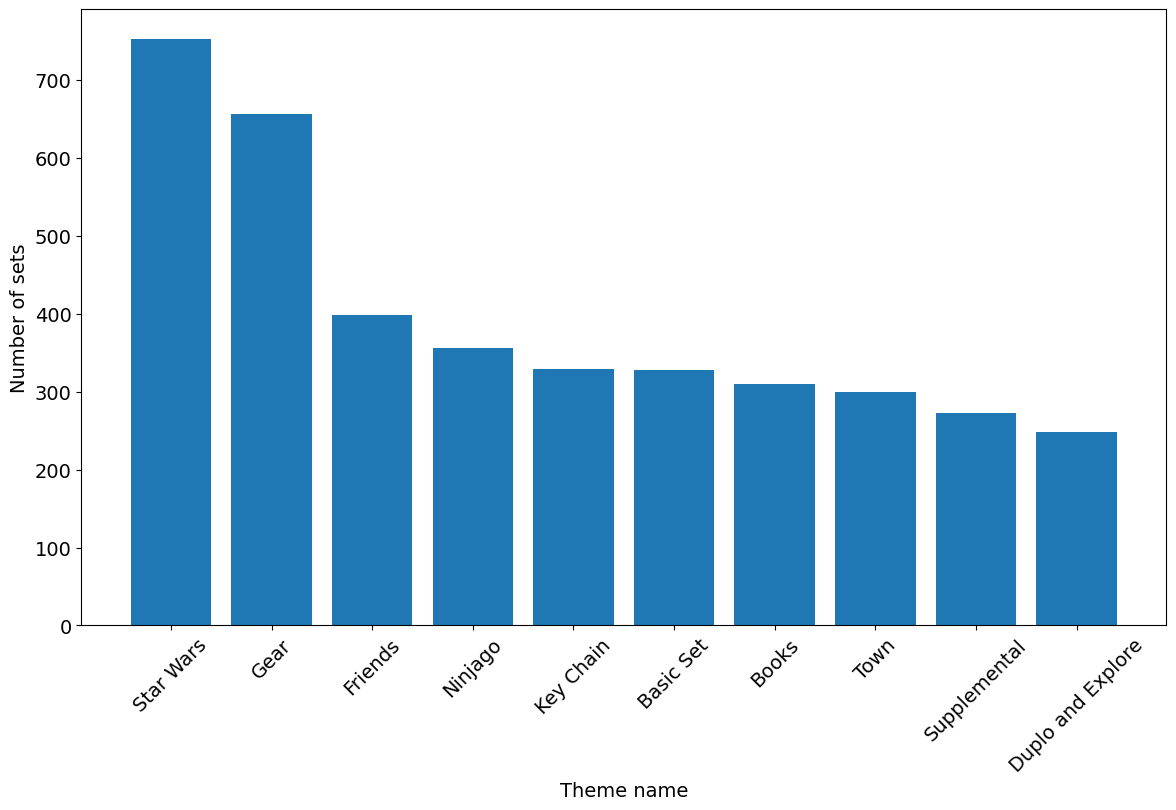

In [69]:
plt.figure(figsize=(14, 8))
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

plt.ylabel('Number of sets', fontsize=14)
plt.xlabel('Theme name', fontsize=14)
plt.bar(mergde_df.name[:10], mergde_df.set_count[:10])